# Gradients
---

In vector calculus, the gradient of a scalar-valued differentiable function $f$, of several variables $f:\mathbf{R}^n \rightarrow \mathbf{R}$, is the vector field, whose value at point $p$ is a the vector whose components are the partial derivatives of $f$ at $p$.

For a 1D function $f$ depending on variable $x$, the gradient is simply the derivative of the function. At a given point, the derivative gives the local slope of the function.

For example, let's consider the function $f(x) = x$. The derivative of this function is $f'(x) = 1$. So this function is a straight line, and its derivative is a constant, which means that the slope is a constant.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

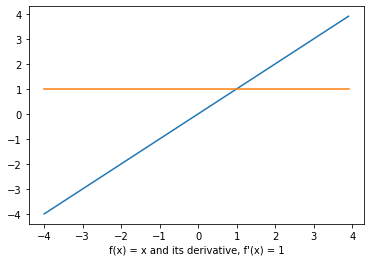

In [3]:
x_values = np.arange(-4,4,0.1)

f_x = np.array([x for x in x_values])
g_x = np.array([1 for _ in x_values])

plt.plot(x_values, f_x)
plt.plot(x_values, g_x)

plt.xlabel("f(x) = x and its derivative, f'(x) = 1")

plt.show()

If we now consider $f(x) = x^2$, the derivative is $f(x) = 2x$. For $x<0$, the derivative is negative and the function is decreasing. For $x>0$, the derivative is positive and the function is increasing. For $x = 0$, the derivative is 0. This means that the local slope is 0. In other words, here, the function is locally flat.

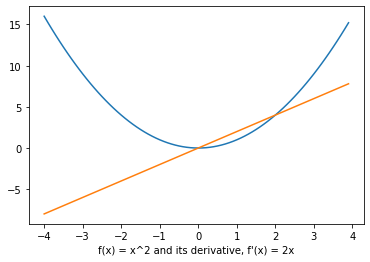

In [4]:
x_values = np.arange(-4,4,0.1)
f_x = np.array([x**2 for x in x_values])
g_x = np.array([2*x for x in x_values])

plt.plot(x_values, f_x)
plt.plot(x_values, g_x)

plt.xlabel("f(x) = x^2 and its derivative, f'(x) = 2x")

plt.show()

In 2D, in the $(x,y)$ plane, a function of $x$ and $y$ is a surface giving the altitude at every point. The gradient is the generalization of the derivative: at a given $(x,y)$ point, the gradient is oriented towards the direction of maximum slope, and its magnitude is the slope of the plane tangent to the surface at this point. 

![Gradient](images/Gradient2.svg.png)

The gradient, represented by the blue arrows, denote the direction of greatest change of a scalar function. The values of the function are represented in greyscale and increase in value from white (low) to dark (high).

In a black and white picture, the greyscale level is analogous to the altitude, and the gradient is a measure of how fast the level changes and of the direction of the change. An edge in the picture (a black to white transition) leads to a large gradient perpendicular to the edge, from white to black. In a colour picture, one can compute a gradient for each colour level, and e.g. take the maximum gradient over the three colour levels.

### How to calculate the gradient of an image?

An image gradient is a directional change in the intensity or color in an image. Mathematically, the gradient of a two-variable function (here the image intensity function) at each image point is a 2D vector with the components given by the derivatives in the horizontal and vertical directions. At each image point, the gradient vector points in the direction of largest possible intensity increase, and the length of the gradient vector corresponds to the rate of change in that direction.

Since the intensity function of a digital image is only known at discrete points, derivatives of this function cannot be defined unless we assume that there is an underlying continuous intensity function which has been sampled at the image points.

Approximations of these derivative functions can be defined at varying degrees of accuracy. One such way is by  by using finite differences.

A finite differene is an expression of the form $f(x+b)-f(x+a)$.

Three types are commonly considered: forward, backward, and central finite differences.

1. A forward finite difference is given by: $f(x+h) - f(x)$
2. A backward finite difference is given by: $f(x) - f(x-h)$
3. A central difference is given by: $f(x+h)-f(x-h)$

For image processing, a central difference is usually used to calculate the gradient. In this case, $f(x,y)$ is the color of a pixel at location $(x,y)$, and the gradient vector of the pixel is defined as:

\begin{equation*}
\nabla f(x,y) =  \begin{bmatrix} g_x \\ g_y \end{bmatrix} = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix}
\end{equation*}

\begin{equation*}
\nabla f(x,y) =  \begin{bmatrix} f(x+1, y) - f(x-1,y) \\ f(x,y+1) - f(x,y-1) \end{bmatrix}
\end{equation*}

![Image gradient](images/image-gradient-vector-pixel-location.png)

For the case of $\frac{\partial f}{\partial y}$ we can apply a 1-dimensional filter to the image $\mathbf{A}$ by convolution:

\begin{equation*}
\frac{\partial f}{\partial y} = \begin{bmatrix} 0 & 1 & 0\\ 0 & 0 & 0 \\ 0 & -1 & 0 \end{bmatrix} * \mathbf{A}
\end{equation*}

For the case of $\frac{\partial f}{\partial x}$ we can use the transpose of the previous filter:

\begin{equation*}
\frac{\partial f}{\partial x} = \begin{bmatrix} 0 & 0 & 0\\ -1 & 0 & 1 \\ 0 & 0 & 0\end{bmatrix} * \mathbf{A}
\end{equation*}

With $g_x$ and $g_y$, we can calculate the direction and the magnitud of the gradient:

\begin{equation*}
\theta = \arctan \bigg(\frac{g_y}{g_x}\bigg)\\
||\nabla f|| = \sqrt{g_x^2 + g_y^2}
\end{equation*}

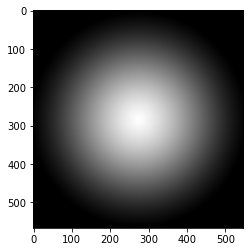

In [5]:
radial_gradient = cv2.imread('images/smooth_radial_gradient.png')
gray_gradient = cv2.cvtColor(radial_gradient, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_gradient, cmap='gray')

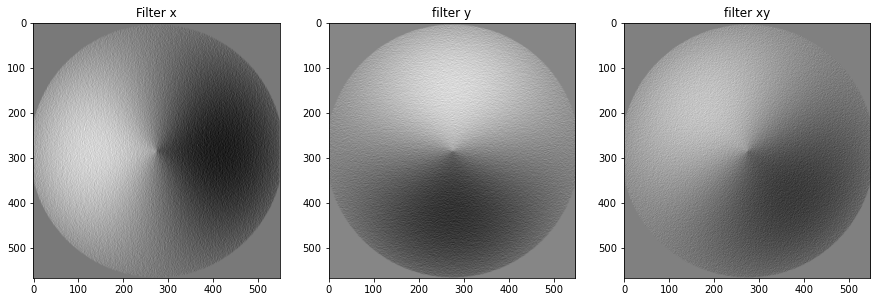

In [6]:
# A more detailed approach would be to consider the following kernels:

filter_x = np.array(
            [
            [-1, 0, 1],
            [-1, 0, 1],
            [-1, 0, 1]
            ])

filter_y = np.array(
            [
                [-1, -1, -1],
                [0, 0, 0],
                [1, 1, 1]
            ])

filter_xy = np.array(
            [
                [0, -1, 0],
                [-1, 0, 1],
                [0, 1, 0]
            ])

filtered_gradient_x = np.zeros(gray_gradient.shape)
filtered_gradient_y = np.zeros(gray_gradient.shape)

filtered_gradient_x = cv2.filter2D(gray_gradient, cv2.CV_32F, filter_x)
filtered_gradient_y = cv2.filter2D(gray_gradient, cv2.CV_32F, filter_y)
filtered_gradient_xy = cv2.filter2D(gray_gradient, cv2.CV_32F, filter_xy)

f, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.set_title('Filter x')
ax1.imshow(filtered_gradient_x, cmap='gray')

ax2.set_title('filter y')
ax2.imshow(filtered_gradient_y, cmap='gray')

ax3.set_title('filter xy')
ax3.imshow(filtered_gradient_xy, cmap='gray')

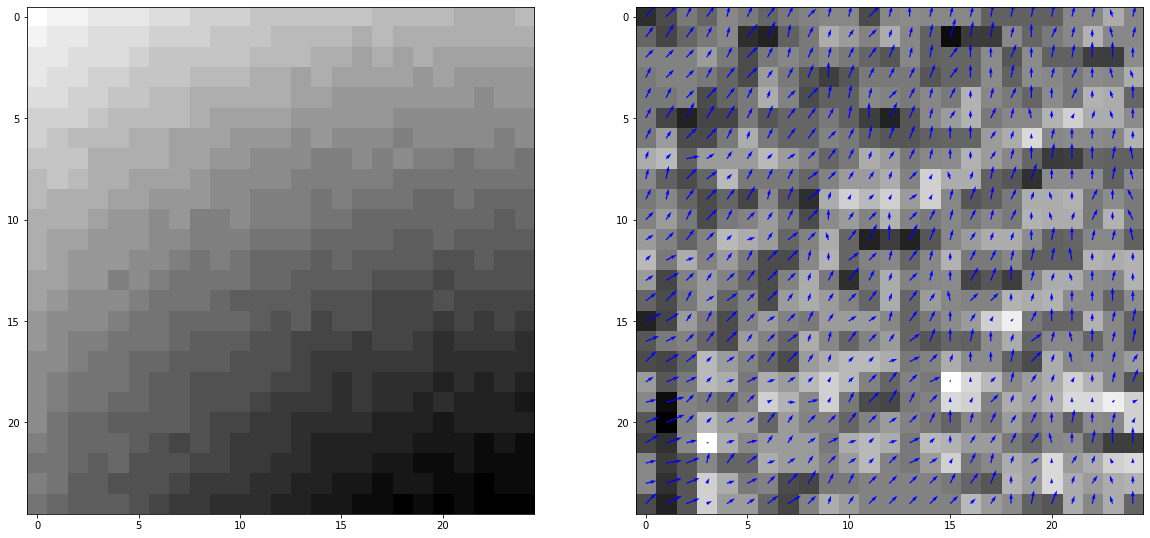

In [10]:
# compute the magnitude and angle of the gradients
norm, angle = cv2.cartToPolar(filtered_gradient_x[250:275, 250:275],filtered_gradient_y[250:275, 250:275],angleInDegrees=True)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,20))

# display the image
ax1.imshow(gray_gradient[250:275, 250:275], cmap='binary')

# superimpose an arrow showing the gradient magnitude and direction: 
ax2.quiver(filtered_gradient_x[250:275, 250:275],filtered_gradient_y[250:275, 250:275], color='blue')

# display the magnitude of the gradients:
ax2.imshow(norm, cmap='binary')